# Train ADALINE on IRIS data

In [1]:
from sklearn import datasets
import numpy as np  
import matplotlib.pyplot as plt 

In [2]:
datas=datasets.load_iris()
X=datas['data'][:100]      #first two class only.
y=datas['target'][:100]
# print(X.shape, y.shape)

X=X[:,:2]  #first two column.

# Standardize the data 
X=(X-X.mean(axis=0))/X.std(axis=0)
# y=y.reshape(-1,1)
print('X:',X.shape, '  y:',y.shape)

X: (100, 2)   y: (100,)


In [3]:
y[y==0]=-1
print(y)

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1]


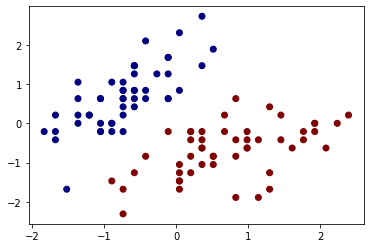

In [4]:
plt.scatter(X[:,0], X[:,1], c=y, cmap='jet') 
plt.show()

In [5]:
#don't run this cell twice because each time it adds a column full of 1
X=np.c_[np.ones(X.shape[0]), X]  #adding a 1 in the first column to alleviate use of bias. 
print('Data shape:',X.shape)
print('First five data\n',X[:5])

Data shape: (100, 3)
First five data
 [[ 1.         -0.5810659   0.84183714]
 [ 1.         -0.89430898 -0.2078351 ]
 [ 1.         -1.20755205  0.21203379]
 [ 1.         -1.36417359  0.00209934]
 [ 1.         -0.73768744  1.05177159]]


<b>Theory</b> <br>
Let, y=target class, $y_{in}$=preactivation outptu, X= input vectors, w= weights
 
Let, <br>
y: Nx1 <br>
X: NxD<br>
w: 1xD<br>
yin: w.X^T => (1xD).(DxN)=>(1xN)<br>
dw: (1xN) <br>
dw.X: (1xN).(NxD):1xD 

<b>First Task: Output calculation</b>
net output (preactivation)
$$y_{in}=w.X^T$$

Let, w=np.array( [ 0.3, 0.1, -0.4] )<br>
First five values should be close to the following<br>
[-0.09484145,  0.29370314,  0.09443128,  0.1627429 , -0.19447738]

In [6]:
w=np.array([0.3,0.1,-0.4])
x=np.transpose(X)
y_in=np.dot(w,x)
print(y_in[:5])

[-0.09484145  0.29370314  0.09443128  0.1627429  -0.19447738]


<b>Second Task: Update</b>
update rule.
$$w :=w+ \eta(y-y_{in})X/N $$
which can be written as,<br>
$$dw= y-y_{in} $$
$$w :=w+ \eta(dw.X)/N $$

Let, eta=0.01<br>
Updated w should like below<br>
w=[ 2.22044605e-16,  6.45919846e-01, -6.70091761e-01]

In [7]:

eta=0.01
ln=len(y)
for i in range(ln):
    dw=y[i]-y_in[i]
    w+=(eta*(dw*X[i]))
    
print(w)

[ 2.34187669e-16  6.45919846e-01 -6.70091761e-01]


<b>Third Task: calculate loss</b>
$$E=(y-y_{in})^2$$

Output should look like or close to 0.5782685616058213

In [8]:

E=0
for i in range(len(y)):
    E+=(y[i]-y_in[i])**2
    
print(E/len(y)) 

0.578268561605821


<b>Fourth Task: Train Adaline</b>

Algorithm.<br>
Choose learning rate eta=0.01 (try with different values)<br>
w=randomly initialize<br>
Repeat the following steps (1,2,3) for n time. Let, say n=1000<br>
1. calculate yin for all the data.
2. $dw=(y-y_{in})$
3. update w. $w :=w+ \eta (dw.x)/N $
4. calculate and record loss

Finally,
print w<br>
Plot loss<br>
Adjust number epoch and re-train<br>
classify all the data  $yout=sign(w.X^T)$<br>
plot decision boundary <br>
Calculate accuracy.

In [9]:

eta=0.01
w=np.random.random_sample((3,))
loss=[]

for i in range(10000):
    x=np.transpose(X)
    y_in=np.dot(w,x)
    #print(y_in[:5])

    for j in range(len(X)):
        dw=y[j]-y_in[j]
        w+=(eta*(dw*X[j]))
    #print(w)

    E=0
    for k in range(len(X)):
        E+=(y[k]-y_in[k])**2
    E/=len(X)
    loss.append(E)
    
#print(E/len(y))
print(w)

[ 2.36703018e-15  6.12013126e-01 -5.64655071e-01]


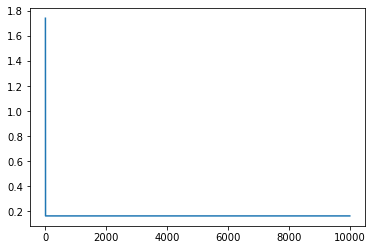

In [10]:
plt.plot(loss)
plt.show()

In [11]:
def sign(val):
    for i in range(len(val)):
        if(val[i]<0):
            val[i]=-1
        else:
            val[i]=1
    return val

In [12]:
y_out=np.dot(w,x)
#print(y_out)
y_out=sign(y_out)
print(y_out)

[-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1.  1. -1. -1. -1. -1. -1. -1. -1. -1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]


In [13]:
coun=0
for i in range(len(y)):
    if(y[i]==y_out[i]):
        coun+=1
accu=coun/100
print('Accuracy : ',accu*100,'%')

Accuracy :  99.0 %


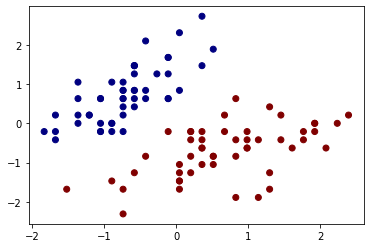

In [14]:
plt.scatter(X[:,1],X[:,2], c=y_out, cmap='jet') 
plt.show()

<b>Fifth Task: plot decision boundary</b>

In [16]:
xd=np.arange(-3, 3+1, 0.01)
yd=np.arange(-3,3+1, 0.01)
xx,yy=np.meshgrid(xd,yd)
nx=np.array([xx.flatten(), yy.flatten()]).T
nx=np.c_[np.ones(nx.shape[0]), nx]
nx.shape

(490000, 3)

In [17]:
#classify all the data (nx) 
out=np.dot(nx,w)
out=np.sign(out)
print(out)

[-1. -1. -1. ...  1.  1.  1.]


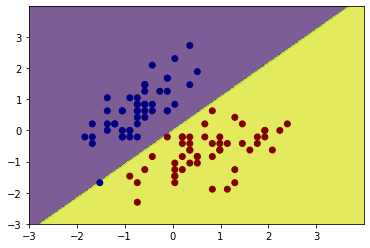

In [18]:
out=out.reshape(xx.shape) 
plt.contourf(xx, yy, out, alpha=0.7 )
plt.scatter(X[:,1],X[:, 2],marker='o', c=y, cmap='jet') 
plt.show()